In [151]:
# Add the directory containing api_connection.py to the system path
import sys
import os
from pathlib import Path
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
sys.path.append(str(Path.cwd() / "bachelor_thesis"))
from api_connection import QiskitService

In [152]:
# Define quantum and classical registers
data = QuantumRegister(7, 'data')          # 7 data qubits for the encoded state
ancilla_x0 = QuantumRegister(1, 'anc_x0')  # Separate ancilla for X stabilizer 1
ancilla_x1 = QuantumRegister(1, 'anc_x1')  # Separate ancilla for X stabilizer 2
ancilla_x2 = QuantumRegister(1, 'anc_x2')  # Separate ancilla for X stabilizer 3
ancilla_z0 = QuantumRegister(1, 'anc_z0')  # Separate ancilla for Z stabilizer 1
ancilla_z1 = QuantumRegister(1, 'anc_z1')  # Separate ancilla for Z stabilizer 2
ancilla_z2 = QuantumRegister(1, 'anc_z2')  # Separate ancilla for Z stabilizer 3
syndrome_x = ClassicalRegister(3, 'sx')    # 3 classical bits for X syndromes
syndrome_z = ClassicalRegister(3, 'sz')    # 3 classical bits for Z syndromes

# Initialize the quantum circuit
circuit = QuantumCircuit(data, ancilla_x0, ancilla_x1, ancilla_x2, ancilla_z0, ancilla_z1, ancilla_z2, syndrome_x, syndrome_z)

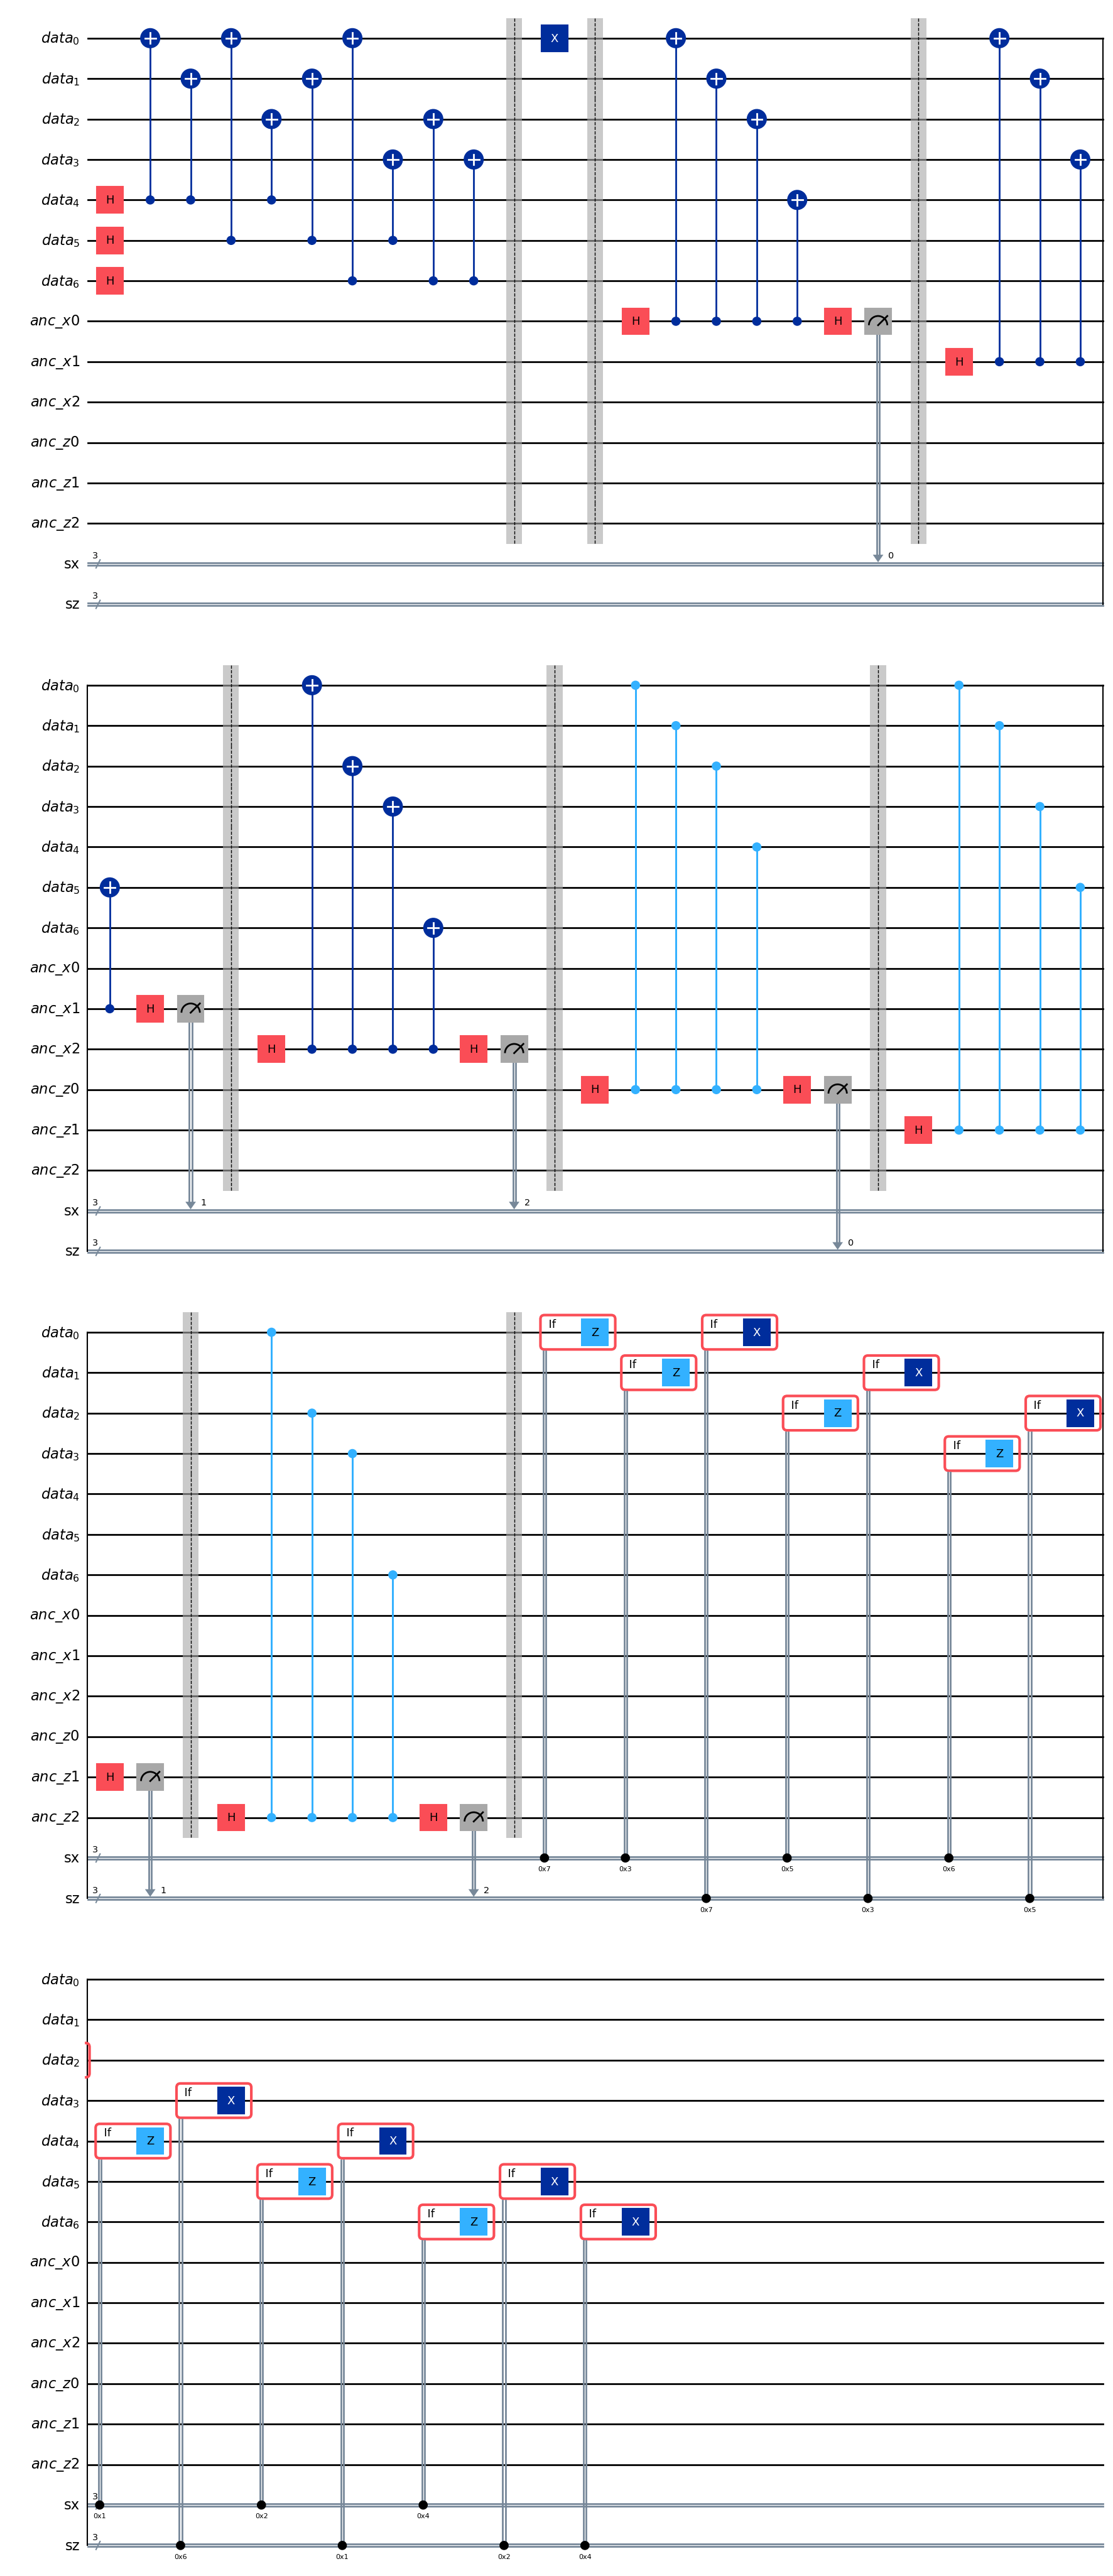

In [153]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Define quantum and classical registers
data = QuantumRegister(7, 'data')          # 7 data qubits for the encoded state
ancilla_x0 = QuantumRegister(1, 'anc_x0')  # Separate ancilla for X stabilizer 1
ancilla_x1 = QuantumRegister(1, 'anc_x1')  # Separate ancilla for X stabilizer 2
ancilla_x2 = QuantumRegister(1, 'anc_x2')  # Separate ancilla for X stabilizer 3
ancilla_z0 = QuantumRegister(1, 'anc_z0')  # Separate ancilla for Z stabilizer 1
ancilla_z1 = QuantumRegister(1, 'anc_z1')  # Separate ancilla for Z stabilizer 2
ancilla_z2 = QuantumRegister(1, 'anc_z2')  # Separate ancilla for Z stabilizer 3
syndrome_x = ClassicalRegister(3, 'sx')    # 3 classical bits for X syndromes
syndrome_z = ClassicalRegister(3, 'sz')    # 3 classical bits for Z syndromes

# Initialize the quantum circuit
circuit = QuantumCircuit(data, ancilla_x0, ancilla_x1, ancilla_x2, ancilla_z0, ancilla_z1, ancilla_z2, syndrome_x, syndrome_z)

# Step 1: Encode the logical |0_L⟩ state
circuit.h(data[4])  # Hadamard on qubit 4
circuit.h(data[5])  # Hadamard on qubit 5
circuit.h(data[6])  # Hadamard on qubit 6
circuit.cx(data[4], data[0])  # CNOT from qubit 4 to qubit 0
circuit.cx(data[4], data[1])  # CNOT from qubit 4 to qubit 1
circuit.cx(data[4], data[2])  # CNOT from qubit 4 to qubit 2
circuit.cx(data[5], data[0])  # CNOT from qubit 5 to qubit 0
circuit.cx(data[5], data[1])  # CNOT from qubit 5 to qubit 1
circuit.cx(data[5], data[3])  # CNOT from qubit 5 to qubit 3
circuit.cx(data[6], data[0])  # CNOT from qubit 6 to qubit 0
circuit.cx(data[6], data[2])  # CNOT from qubit 6 to qubit 2
circuit.cx(data[6], data[3])  # CNOT from qubit 6 to qubit 3
circuit.barrier()  # Barrier for visual separation

# Step 2: Introduce an error (optional, for testing)
circuit.x(data[0])  # Apply an X error on qubit 0
circuit.barrier()

# Step 3: Measure X stabilizers for bit-flip errors
# Stabilizer 1: X0 X1 X2 X4
circuit.h(ancilla_x0[0])  # Prepare ancilla in |+⟩
circuit.cx(ancilla_x0[0], data[0])
circuit.cx(ancilla_x0[0], data[1])
circuit.cx(ancilla_x0[0], data[2])
circuit.cx(ancilla_x0[0], data[4])
circuit.h(ancilla_x0[0])  # Return ancilla to computational basis
circuit.measure(ancilla_x0[0], syndrome_x[0])  # Measure syndrome
circuit.barrier()

# Stabilizer 2: X0 X1 X3 X5
circuit.h(ancilla_x1[0])
circuit.cx(ancilla_x1[0], data[0])
circuit.cx(ancilla_x1[0], data[1])
circuit.cx(ancilla_x1[0], data[3])
circuit.cx(ancilla_x1[0], data[5])
circuit.h(ancilla_x1[0])
circuit.measure(ancilla_x1[0], syndrome_x[1])
circuit.barrier()

# Stabilizer 3: X0 X2 X3 X6
circuit.h(ancilla_x2[0])
circuit.cx(ancilla_x2[0], data[0])
circuit.cx(ancilla_x2[0], data[2])
circuit.cx(ancilla_x2[0], data[3])
circuit.cx(ancilla_x2[0], data[6])
circuit.h(ancilla_x2[0])
circuit.measure(ancilla_x2[0], syndrome_x[2])
circuit.barrier()

# Step 4: Measure Z stabilizers for phase-flip errors
# Stabilizer 4: Z0 Z1 Z2 Z4
circuit.h(ancilla_z0[0])  # Prepare ancilla in |+⟩
circuit.cz(ancilla_z0[0], data[0])  # Controlled-Z gate
circuit.cz(ancilla_z0[0], data[1])
circuit.cz(ancilla_z0[0], data[2])
circuit.cz(ancilla_z0[0], data[4])
circuit.h(ancilla_z0[0])
circuit.measure(ancilla_z0[0], syndrome_z[0])
circuit.barrier()

# Stabilizer 5: Z0 Z1 Z3 Z5
circuit.h(ancilla_z1[0])
circuit.cz(ancilla_z1[0], data[0])
circuit.cz(ancilla_z1[0], data[1])
circuit.cz(ancilla_z1[0], data[3])
circuit.cz(ancilla_z1[0], data[5])
circuit.h(ancilla_z1[0])
circuit.measure(ancilla_z1[0], syndrome_z[1])
circuit.barrier()

# Stabilizer 6: Z0 Z2 Z3 Z6
circuit.h(ancilla_z2[0])
circuit.cz(ancilla_z2[0], data[0])
circuit.cz(ancilla_z2[0], data[2])
circuit.cz(ancilla_z2[0], data[3])
circuit.cz(ancilla_z2[0], data[6])
circuit.h(ancilla_z2[0])
circuit.measure(ancilla_z2[0], syndrome_z[2])
circuit.barrier()

# Step 5: Apply corrections based on syndromes using IfElseOp
# Corrections for X syndromes (Z errors)
with circuit.if_test((syndrome_x, 0b111)):  # '111' -> Z error on qubit 0
    circuit.z(data[0])
with circuit.if_test((syndrome_x, 0b011)):  # '011' -> Z error on qubit 1
    circuit.z(data[1])
with circuit.if_test((syndrome_x, 0b101)):  # '101' -> Z error on qubit 2
    circuit.z(data[2])
with circuit.if_test((syndrome_x, 0b110)):  # '110' -> Z error on qubit 3
    circuit.z(data[3])
with circuit.if_test((syndrome_x, 0b001)):  # '001' -> Z error on qubit 4
    circuit.z(data[4])
with circuit.if_test((syndrome_x, 0b010)):  # '010' -> Z error on qubit 5
    circuit.z(data[5])
with circuit.if_test((syndrome_x, 0b100)):  # '100' -> Z error on qubit 6
    circuit.z(data[6])

# Corrections for Z syndromes (X errors)
with circuit.if_test((syndrome_z, 0b111)):  # '111' -> X error on qubit 0
    circuit.x(data[0])
with circuit.if_test((syndrome_z, 0b011)):  # '011' -> X error on qubit 1
    circuit.x(data[1])
with circuit.if_test((syndrome_z, 0b101)):  # '101' -> X error on qubit 2
    circuit.x(data[2])
with circuit.if_test((syndrome_z, 0b110)):  # '110' -> X error on qubit 3
    circuit.x(data[3])
with circuit.if_test((syndrome_z, 0b001)):  # '001' -> X error on qubit 4
    circuit.x(data[4])
with circuit.if_test((syndrome_z, 0b010)):  # '010' -> X error on qubit 5
    circuit.x(data[5])
with circuit.if_test((syndrome_z, 0b100)):  # '100' -> X error on qubit 6
    circuit.x(data[6])

# Optional: Visualize the circuit
circuit.draw(output='mpl')

In [ ]:
# Set up the preset pass manager with optimization level 0
preset_manager = generate_preset_pass_manager(backend=backend, optimization_level=0)
preset_circuit = preset_manager.run(circuit)

# Run the circuit using the Sampler
job = Sampler(mode=backend).run([(preset_circuit)], shots=5000)
print(f"Job ID: {job.job_id()}, \n Job Status: {job.status()}")

Job ID: czattw3b7tt0008g8ad0, 
 Job Status: QUEUED


In [155]:
# Get and display results
result = job.result()
pub_result = result[0]
print(f"Counts for the 'sx' output register: {pub_result.data.sx.get_counts()}")
print(f"Counts for the 'sz' output register: {pub_result.data.sz.get_counts()}")

Counts for the 'sx' output register: {'001': 604, '100': 620, '111': 637, '010': 644, '000': 596, '110': 649, '101': 622, '011': 628}
Counts for the 'sz' output register: {'110': 581, '001': 683, '100': 632, '011': 625, '101': 646, '111': 616, '010': 608, '000': 609}


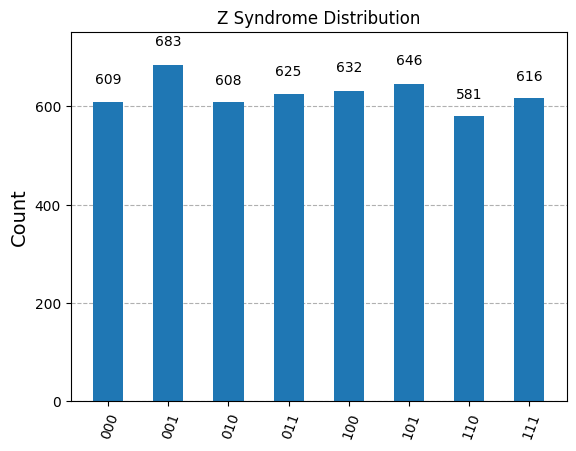

In [156]:

# Optional: Visualize the syndrome distributions
plot_histogram(pub_result.data.sx.get_counts(), title="X Syndrome Distribution")
plot_histogram(pub_result.data.sz.get_counts(), title="Z Syndrome Distribution")